#UAV DETECTION AND TRACKING
Multi-Object Tracking (MOT) is a core visual ability that humans poses to perform kinetic tasks and coordinate other tasks. The AI community has recognized the importance of MOT via a series of competitions.

In this assignment, the object class is drone and the ability to track this object will be demonstrated using Kalman Filters. The assignment will give you the opportunity to apply probabilistic reasoning in the physical security application space.

#Task 1: Setup your development environment and store the test videos locally (10 points)

**YOLO Drone Detection Dataset**
https://www.kaggle.com/datasets/muki2003/yolo-drone-detection-dataset?source=post_page-----2700dadc8de7--------------------------------

kaggle dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Extract the Dataset:

In [ ]:
import zipfile
import os

zip_path = '/content/gdrive/MyDrive/archive.zip'
extract_path = '/content/gdrive/MyDrive/archive'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Verify extraction
print(f'Files extracted to: {extract_path}')

Files extracted to: /content/gdrive/MyDrive/archive


#List the Contents of the Extracted Directory

In [ ]:
import os

# Define the path to explore
extracted_path = '/content/gdrive/MyDrive/archive'

# List the contents of the extracted directory
for root, dirs, files in os.walk(extracted_path):
    print(f"Root: {root}")
    print(f"Directories: {dirs}")
    print(f"Files: {files}")
    print("\n")


Root: /content/gdrive/MyDrive/archive
Directories: ['drone_dataset']
Files: []


Root: /content/gdrive/MyDrive/archive/drone_dataset
Directories: ['train', 'valid']
Files: ['data.yaml']


Root: /content/gdrive/MyDrive/archive/drone_dataset/train
Directories: ['images', 'labels']
Files: ['labels.cache']


Root: /content/gdrive/MyDrive/archive/drone_dataset/train/images
Directories: []
Files: ['pic_049.jpg', 'pic_048.jpg', 'pic_050.jpg', 'pic_051.jpg', 'pic_052.jpg', 'pic_053.jpg', 'pic_054.jpg', 'pic_055.jpg', 'pic_056.jpg', 'pic_057.jpg', 'pic_058.jpg', 'pic_059.jpg', 'pic_060.jpg', 'pic_061.jpg', 'pic_062.jpg', 'pic_063.jpg', 'pic_065.jpg', 'pic_066.jpg', 'pic_064.jpg', 'pic_067.jpg', 'pic_069.jpg', 'pic_068.jpg', 'pic_070.jpg', 'pic_071.jpg', 'pic_073.jpg', 'pic_075.jpg', 'pic_074.jpg', 'pic_076.jpg', 'pic_077.jpg', 'pic_078.jpg', 'pic_079.jpg', 'pic_080.jpg', 'pic_081.jpg', 'pic_082.jpg', 'pic_083.jpg', 'pic_084.jpg', 'pic_086.jpg', 'pic_085.jpg', 'pic_087.jpg', 'pic_088.jpg', 'pic_

#List the Contents of the Adjusted Directories

In [ ]:
import os

# Define the paths
train_image_dir = '/content/gdrive/MyDrive/archive/drone_dataset/train/images'
train_label_dir = '/content/gdrive/MyDrive/archive/drone_dataset/train/labels'
valid_image_dir = '/content/gdrive/MyDrive/archive/drone_dataset/valid/images'
valid_label_dir = '/content/gdrive/MyDrive/archive/drone_dataset/valid/labels'

# List a few training image files
train_image_files = os.listdir(train_image_dir)
print(f"Training image files: {train_image_files[:5]}")  # Display first 5 training image files

# List a few training label files
train_label_files = os.listdir(train_label_dir)
print(f"Training label files: {train_label_files[:5]}")  # Display first 5 training label files

# List a few validation image files
valid_image_files = os.listdir(valid_image_dir)
print(f"Validation image files: {valid_image_files[:5]}")  # Display first 5 validation image files

# List a few validation label files
valid_label_files = os.listdir(valid_label_dir)
print(f"Validation label files: {valid_label_files[:5]}")  # Display first 5 validation label files


Training image files: ['pic_049.jpg', 'pic_048.jpg', 'pic_050.jpg', 'pic_051.jpg', 'pic_052.jpg']
Training label files: ['pic_047.txt', 'pic_049.txt', 'pic_050.txt', 'pic_052.txt', 'pic_051.txt']
Validation image files: ['0005.jpg', '0006.jpg', '0003.jpg', '0001.jpg', '0004.jpg']
Validation label files: ['0007.txt', '0009.txt', '0010.txt', '0008.txt', '0004.txt']


#Display a Sample Image

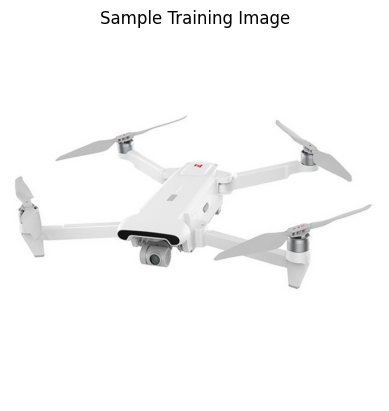

In [ ]:
import matplotlib.pyplot as plt
import cv2

# Define the path to a sample training image
sample_train_image_path = '/content/gdrive/MyDrive/archive/drone_dataset/train/images'
train_image_files = os.listdir(sample_train_image_path)
sample_image_path = os.path.join(sample_train_image_path, train_image_files[0])

# Read and display the sample image
image = cv2.imread(sample_image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title('Sample Training Image')
plt.axis('off')
plt.show()


#Display a Sample Label

In [ ]:
# Define the path to a sample training label
sample_train_label_path = '/content/gdrive/MyDrive/archive/drone_dataset/train/labels'
train_label_files = os.listdir(sample_train_label_path)
sample_label_path = os.path.join(sample_train_label_path, train_label_files[0])

# Read and display the content of the sample label file
with open(sample_label_path, 'r') as file:
    label_content = file.read()
print(f"Training label content for {train_label_files[0]}:\n{label_content}")


Training label content for pic_048.txt:
0 0.493 0.487 0.956 0.398



#Verify the Label Format

In [ ]:
# Check the content of the sample label file
with open(sample_label_path, 'r') as file:
    label_content = file.readlines()

print("Sample label file content:")
for line in label_content:
    print(line.strip())

# Ensure the format is correct
for line in label_content:
    values = line.strip().split()
    if len(values) != 5:
        print(f"Incorrect format: {line.strip()}")
    else:
        class_id, center_x, center_y, width, height = map(float, values)
        if not (0 <= center_x <= 1 and 0 <= center_y <= 1 and 0 <= width <= 1 and 0 <= height <= 1):
            print(f"Values out of range: {line.strip()}")


Sample label file content:
0 0.493 0.487 0.956 0.398


#Load and Display the YAML File

In [ ]:
import yaml

# Define the path to the data.yaml file
data_yaml_path = '/content/gdrive/MyDrive/archive/drone_dataset/data.yaml'

# Load and display the content of the data.yaml file
with open(data_yaml_path, 'r') as file:
    data_yaml_content = yaml.safe_load(file)

print("Content of data.yaml:")
print(data_yaml_content)


Content of data.yaml:
{'names': ['drone'], 'nc': 1, 'path': '/drone_dataset/', 'train': '/drone_dataset/train', 'val': '/drone_dataset/valid'}


#Correct the data.yml file according to the path

In [ ]:
import yaml

# Define the corrected content for the data.yaml file
correct_data_yaml = {
    'train': '/content/gdrive/MyDrive/archive/drone_dataset/train/images',
    'val': '/content/gdrive/MyDrive/archive/drone_dataset/valid/images',
    'nc': 1,
    'names': ['drone']
}

# Save the corrected content to the data.yaml file
data_yaml_path = '/content/gdrive/MyDrive/archive/drone_dataset/data.yaml'
with open(data_yaml_path, 'w') as file:
    yaml.dump(correct_data_yaml, file)

print("Corrected data.yaml file content:")
print(correct_data_yaml)


Corrected data.yaml file content:
{'train': '/content/gdrive/MyDrive/archive/drone_dataset/train/images', 'val': '/content/gdrive/MyDrive/archive/drone_dataset/valid/images', 'nc': 1, 'names': ['drone']}


#Install Required Libraries

In [ ]:
# Check GPU information
!nvidia-smi

# Install the specific version of Ultralytics
!pip install ultralytics==8.0.28

from ultralytics import YOLO
import ultralytics

# Run checks to verify the installation
ultralytics.checks()


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Setup complete ✅ (12 CPUs, 53.0 GB RAM, 31.0/201.2 GB disk)


#Task 2: Drone Object Detection (40 points)
You need to research can use any dataset that can be used to detect the class drone such as the drones used for the test videos. Please be careful to distinguish between the datasets that detect objects from drones to datasets that detect the drones. Your object detector must use a deep learning model but you can use an existing object detector model architecture.

Split the videos into frames and use each frame to present the drone detections you got. Store all images that you had detections in a folder called detections. Write your code in such a way that a number of videos can be processed from a directory and not just these two.

# Training

**Optimizer and Loss Function:**

YOLOv8 typically uses the Adam optimizer with default parameters for training.

For the loss function, YOLOv8 generally uses a combination of object detection losses like confidence loss (BCE) and localization loss (MSE).

**Hyperparameter Optimization:**

Learning Rate: Experiment with different learning rates (e.g., using a learning rate scheduler) to find the optimal rate for faster convergence without overfitting.
Batch Size: Adjust the batch size to balance training speed and GPU memory usage. Larger batches can sometimes speed up training, but too large can degrade performance.
Image Size (imgsz): Increase or decrease the image size (imgsz) in the training configuration (data.yaml) to trade off between detection accuracy and speed.
Model Architecture:



In [ ]:
# Fine-tune the YOLOv8 model with specified data and settings
!yolo task=detect mode=train model=yolov8s.pt data=/content/gdrive/MyDrive/archive/drone_dataset/data.yaml epochs=1 lr0=0.001  imgsz=640 plots=True

100% 21.5M/21.5M [00:00<00:00, 480MB/s]
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/gdrive/MyDrive/archive/drone_dataset/data.yaml, epochs=1, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize

In [ ]:
import os

# Define the path where the YOLOv8 training results are saved
training_results_path = 'runs/detect/train'

# List contents of the directory
print(os.listdir(training_results_path))

['events.out.tfevents.1720710704.06b098af27b9.12484.0', 'val_batch0_pred.jpg', 'results.png', 'weights', 'confusion_matrix.png', 'args.yaml', 'val_batch1_pred.jpg', 'results.csv', 'train_batch1.jpg', 'val_batch2_pred.jpg', 'P_curve.png', 'train_batch2.jpg', 'val_batch1_labels.jpg', 'F1_curve.png', 'R_curve.png', 'train_batch0.jpg', 'val_batch2_labels.jpg', 'val_batch0_labels.jpg', 'PR_curve.png']


Images:

train_batch*.jpg: These are likely visualizations of training batches during the training process.
val_batch*.jpg: Similar to above, but for validation batches.
Plots:

F1_curve.png, P_curve.png, PR_curve.png, R_curve.png: These are different evaluation metric curves (F1, Precision, Recall, Precision-Recall).
Results:

results.png, results.csv: These files typically contain summarized results or visualizations of the training/validation performance.
confusion_matrix.png: This could be a confusion matrix showing the model's performance on different classes.
Events and Configuration:

events.out.tfevents.*: These are TensorFlow events files, which can be used with tools like TensorBoard for visualization and analysis.
args.yaml: Configuration file containing training arguments/settings.
Weights:

weights/: This directory likely contains the trained model weights (best.pt, last.pt) and possibly other checkpoint files.

#Load the Model

In [ ]:
from ultralytics import YOLO

# Define the path to the best model weights
model_path = 'runs/detect/train/weights/best.pt'

# Load the model
model = YOLO(model_path)

#Perform Real-Time Drone Detection

In [ ]:
from ultralytics import YOLO

# Load the trained YOLOv8 model
model_path = 'runs/detect/train/weights/best.pt'

# Load the model
model = YOLO(model_path)

# Specify the paths to the downloaded videos
# Paths to downloaded videos
video_paths = [
    "/content/VideosDrone Tracking 1.mp4",
    "/content/VideosDrone tracking 2.mp4"
]


# Perform real-time drone detection on each video
for video_path in video_paths:
    try:
        # Run inference on the video and save the results
        results = model(video_path, save=True)
        print(f"Detection results saved for {video_path}")
    except Exception as e:
        print(f"Error processing {video_path}: {str(e)}")

print('Real-Time Detection Completed!')

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

video 1/1 (1/4941) /content/VideosDrone Tracking 1.mp4: 384x640 146.7ms
video 1/1 (2/4941) /content/VideosDrone Tracking 1.mp4: 384x640 7.7ms
video 1/1 (3/4941) /content/VideosDrone Tracking 1.mp4: 384x640 7.1ms
video 1/1 (4/4941) /content/VideosDrone Tracking 1.mp4: 384x640 7.0ms
video 1/1 (5/4941) /content/VideosDrone Tracking 1.mp4: 384x640 7.6ms
video 1/1 (6/4941) /content/VideosDrone Tracking 1.mp4: 384x640 7.1ms
video 1/1 (7/4941) /content/VideosDrone Tracking 1.mp4: 384x640 7.1ms
video 1/1 (8/4941) /content/VideosDrone Tracking 1.mp4: 384x640 7.1ms
video 1/1 (9/4941) /content/VideosDrone Tracking 1.mp4: 384x640 7.1ms
video 1/1 (10/4941) /content/VideosDrone Tracking 1.mp4: 384x640 7.1ms
video 1/1 (11/4941) /content/VideosDrone Tracking 1.mp4: 384x640 6.9ms
video 1/1 (12/4941) /content/VideosDrone Tracking 1.mp4:

Detection results saved for /content/VideosDrone Tracking 1.mp4


Streaming output truncated to the last 5000 lines.
video 1/1 (10412/15409) /content/VideosDrone tracking 2.mp4: 384x640 9.2ms
video 1/1 (10413/15409) /content/VideosDrone tracking 2.mp4: 384x640 9.6ms
video 1/1 (10414/15409) /content/VideosDrone tracking 2.mp4: 384x640 6.9ms
video 1/1 (10415/15409) /content/VideosDrone tracking 2.mp4: 384x640 6.8ms
video 1/1 (10416/15409) /content/VideosDrone tracking 2.mp4: 384x640 7.5ms
video 1/1 (10417/15409) /content/VideosDrone tracking 2.mp4: 384x640 7.6ms
video 1/1 (10418/15409) /content/VideosDrone tracking 2.mp4: 384x640 7.4ms
video 1/1 (10419/15409) /content/VideosDrone tracking 2.mp4: 384x640 7.3ms
video 1/1 (10420/15409) /content/VideosDrone tracking 2.mp4: 384x640 7.2ms
video 1/1 (10421/15409) /content/VideosDrone tracking 2.mp4: 384x640 7.2ms
video 1/1 (10422/15409) /content/VideosDrone tracking 2.mp4: 384x640 7.7ms
video 1/1 (10423/15409) /content/VideosDrone tracking 2.mp4: 384x640 7.0ms
video 1/1 (10424/15409) /content/VideosDrone trac

Detection results saved for /content/VideosDrone tracking 2.mp4
Real-Time Detection Completed!


# Result Interpretation

The detection results include information such as bounding boxes around detected objects (in this case, drones), confidence scores for each detection, and potentially class labels.

These results are typically stored in a structured format that allows post-processing and visualization.

The code saves the detection results into a directory specified by the YOLOv8 model (runs/detect/predict3 in this case).

#Extract frames from .mp4 files





In [ ]:
import cv2
import os

# Function to extract frames from a video
def extract_frames(video_path, output_dir):
    # Open the video file
    cap = cv2.VideoCapture(video_path)

    # Check if the video opened successfully
    if not cap.isOpened():
        print(f"Error opening video file: {video_path}")
        return

    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    frame_count = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Save frame as JPEG file
        frame_path = os.path.join(output_dir, f"frame_{frame_count:04d}.jpg")
        cv2.imwrite(frame_path, frame)

        frame_count += 1

    # Release resources
    cap.release()
    print(f"Frames extracted to {output_dir}")

# Directory containing the videos
videos_directory = '/content/runs/detect/predict/'

# List of video files
video_files = [
    '/content/runs/detect/predict/VideosDrone Tracking 1.mp4',
    '/content/runs/detect/predict/VideosDrone tracking 2.mp4'
]

# Extract frames from each video
for video_file in video_files:
    video_path = os.path.join(videos_directory, video_file)
    output_directory = os.path.join(videos_directory, f"{video_file.split('.')[0]}_frames")

    # Extract frames from the video
    extract_frames(video_path, output_directory)



Frames extracted to /content/runs/detect/predict/VideosDrone Tracking 1_frames
Frames extracted to /content/runs/detect/predict/VideosDrone tracking 2_frames


#display some frames from the .mp4 files





#first video

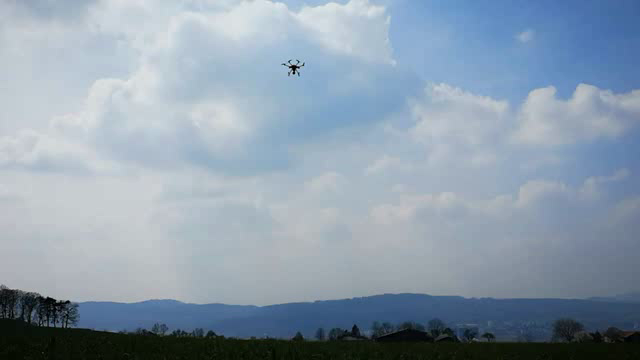

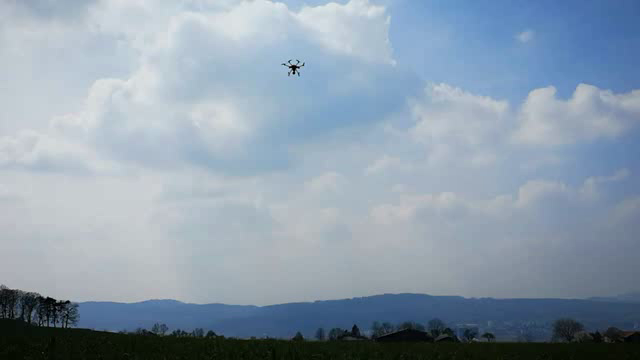

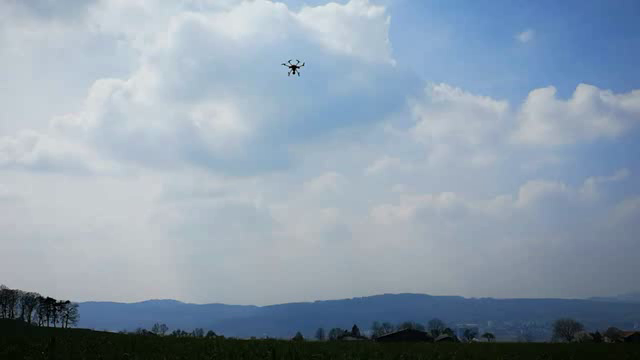

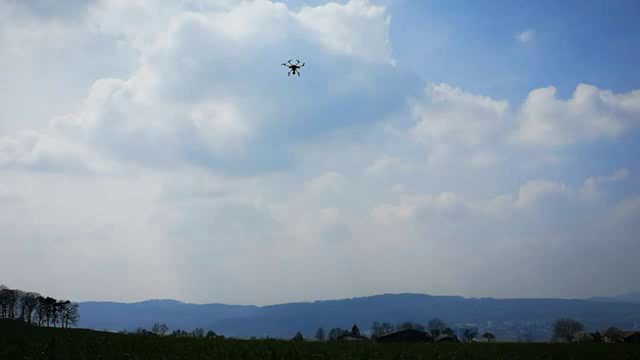

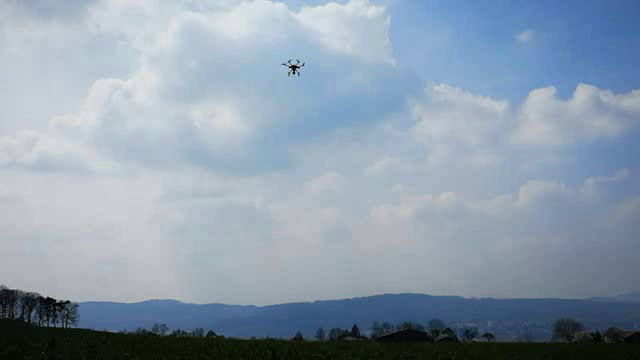

In [ ]:
import os
import cv2
from google.colab.patches import cv2_imshow

# Path to the directory containing saved frames with detections
detections_dir = "/content/runs/detect/predict/"

# List of video files
video_files = [
    '/content/runs/detect/predict/VideosDrone Tracking 1.mp4',
    #'/content/runs/detect/predict/VideosDrone tracking 2.mp4'
]

# Display frames from each video
for video_file in video_files:
    video_path = os.path.join(detections_dir, video_file)

    # Open the video file
    cap = cv2.VideoCapture(video_path)

    # Check if the video opened successfully
    if not cap.isOpened():
        print(f"Error opening video file: {video_path}")
        continue

    frame_count = 0
    num_frames_to_display = 5  # Number of frames to display per video

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Display the frame
        cv2_imshow(frame)

        frame_count += 1
        if frame_count >= num_frames_to_display:
            break

    # Release resources
    cap.release()


#second video

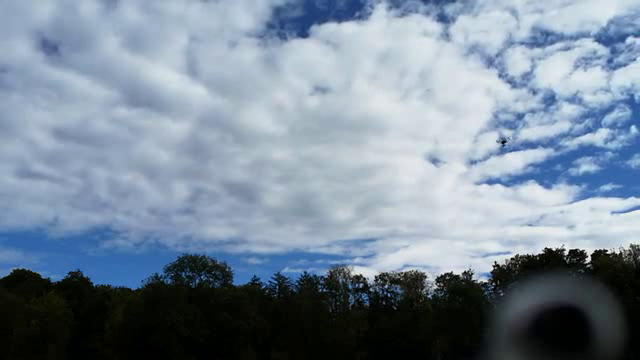

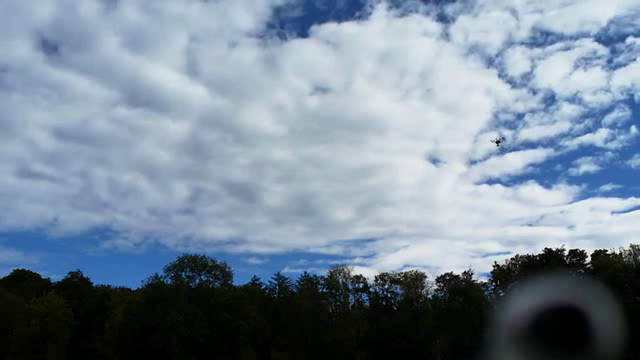

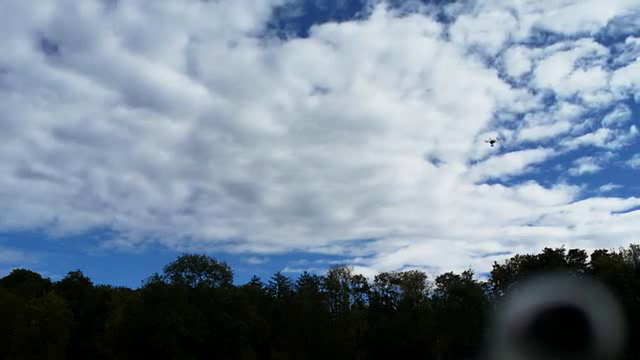

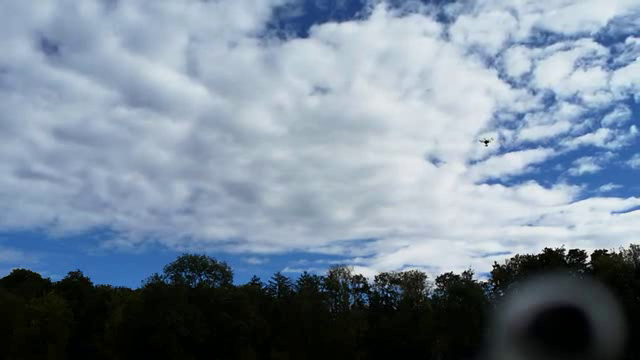

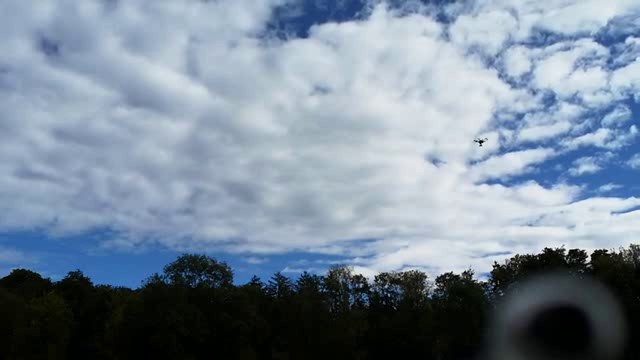

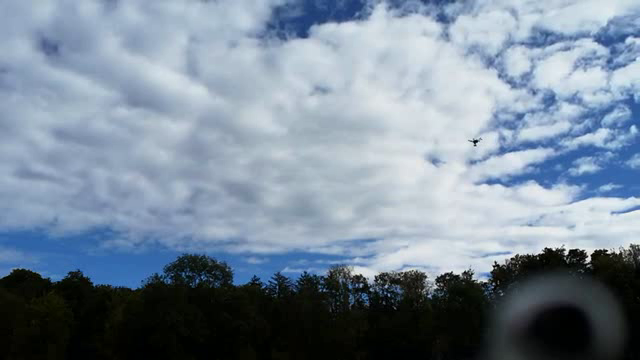

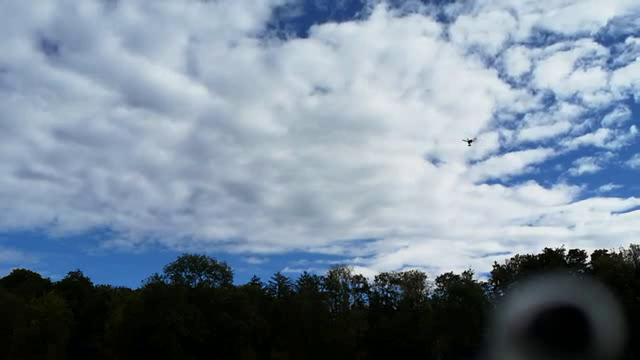

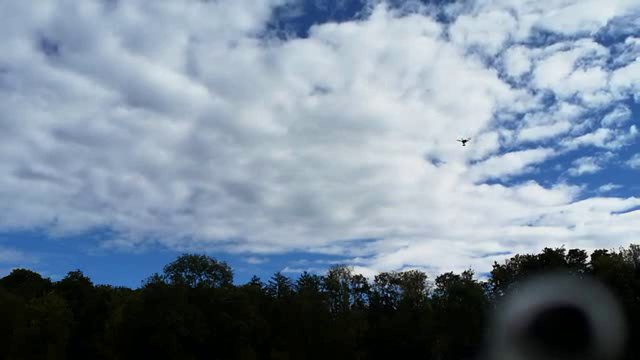

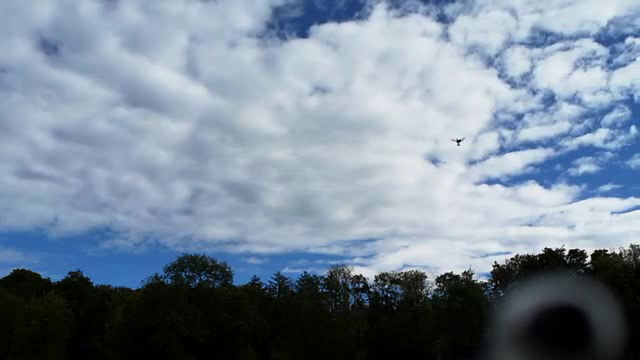

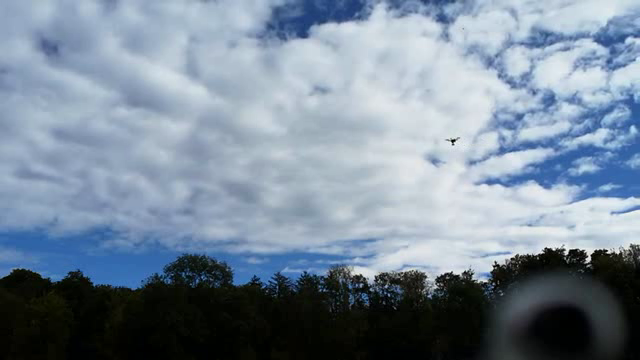

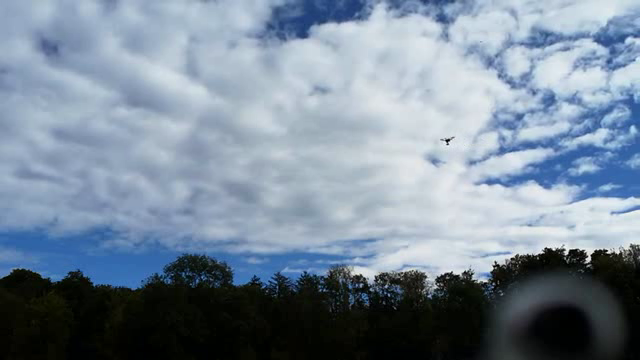

In [ ]:
import os
import cv2
from google.colab.patches import cv2_imshow

# Path to the directory containing saved frames with detections
detections_dir = "/content/runs/detect/predict3/"

# Video file to process
video_file = '/content/runs/detect/predict/VideosDrone tracking 2.mp4'

# Full path to the video file
video_path = os.path.join(detections_dir, video_file)

# Open the video file
cap = cv2.VideoCapture(video_path)

# Check if the video opened successfully
if not cap.isOpened():
    print(f"Error opening video file: {video_path}")
else:
    # Seek to frame 2180
    cap.set(cv2.CAP_PROP_POS_FRAMES, 2180)

    # Display frames from frame 2180 to frame 2190
    start_frame = 2180
    end_frame = 2190

    for frame_count in range(start_frame, end_frame + 1):
        ret, frame = cap.read()
        if not ret:
            break

        # Display the frame
        cv2_imshow(frame)

    # Release resources
    cap.release()


#Write your code in such a way that a number of videos can be processed from a directory and not just these two.

In [ ]:
import os
from glob import glob
from ultralytics import YOLO

# Define the path to the best model weights
model_path = 'runs/detect/train5/weights/best.pt'

# Load the model
model = YOLO(model_path)

# Directory containing the videos
videos_directory = '/content/videos/'

# Get all video files in the directory
video_paths = glob(os.path.join(videos_directory, '*.mp4'))

# Perform real-time drone detection on each video
for video_path in video_paths:
    try:
        # Run inference on the video and save the results
        results = model(video_path, save=True)
        print(f"Detection results saved for {video_path}")
    except Exception as e:
        print(f"Error processing {video_path}: {str(e)}")

print('Real-Time Detection Completed!')


#Task 1 already provided before in github;

---



#Download videos and extract frames

In [ ]:
!pip install yt-dlp
!pip install opencv-python
!pip install numpy
!pip uninstall -y opencv-python-headless
!pip install opencv-python-headless

  Using cached opencv_python_headless-4.10.0.84-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (49.9 MB)


In [ ]:
from yt_dlp import YoutubeDL

SAVE_PATH = "/content/Videos"

links = [
    "https://www.youtube.com/watch?v=YrydHPwRelI&t=438s",
    "https://www.youtube.com/watch?v=DhmZ6W1UAv4&t=43s"
]

ydl_opts = {
    'format': 'mp4',
    'outtmpl': SAVE_PATH + '%(title)s.%(ext)s',
}

with YoutubeDL(ydl_opts) as ydl:
    for link in links:
        try:
            ydl.download([link])
            print(f"Video downloaded successfully: {link}")
        except Exception as e:
            print(f"Download Error for {link}: {str(e)}")

print('Task Completed!')


[youtube] Extracting URL: https://www.youtube.com/watch?v=YrydHPwRelI&t=438s
[youtube] YrydHPwRelI: Downloading webpage
[youtube] YrydHPwRelI: Downloading ios player API JSON
[youtube] YrydHPwRelI: Downloading player 9ed4a7e1
[youtube] YrydHPwRelI: Downloading m3u8 information
[info] YrydHPwRelI: Downloading 1 format(s): 18
[download] Destination: /content/VideosDrone tracking 2.mp4
[download] 100% of   11.84MiB in 00:00:00 at 39.03MiB/s  
Video downloaded successfully: https://www.youtube.com/watch?v=YrydHPwRelI&t=438s
[youtube] Extracting URL: https://www.youtube.com/watch?v=DhmZ6W1UAv4&t=43s
[youtube] DhmZ6W1UAv4: Downloading webpage
[youtube] DhmZ6W1UAv4: Downloading ios player API JSON
[youtube] DhmZ6W1UAv4: Downloading m3u8 information
[info] DhmZ6W1UAv4: Downloading 1 format(s): 18
[download] Destination: /content/VideosDrone Tracking 1.mp4
[download] 100% of    3.08MiB in 00:00:00 at 8.41MiB/s   
Video downloaded successfully: https://www.youtube.com/watch?v=DhmZ6W1UAv4&t=43s
T

#Frames extraction

In [ ]:
import cv2
import os

# Directory to save frames
frame_save_path = "/content/frames/"
os.makedirs(frame_save_path, exist_ok=True)

# Paths to downloaded videos
video_paths = [
    "/content/VideosDrone Tracking 1.mp4",
    "/content/VideosDrone tracking 2.mp4"
]

for video_path in video_paths:
    # Open the video file
    video_capture = cv2.VideoCapture(video_path)

    # Initialize frame count
    frame_count = 0

    while True:
        # Read the next frame
        success, frame = video_capture.read()

        if not success:
            break

        # Save frame as JPEG file
        frame_filename = f"{os.path.splitext(os.path.basename(video_path))[0]}_{frame_count}.jpg"
        frame_filepath = os.path.join(frame_save_path, frame_filename)
        cv2.imwrite(frame_filepath, frame)

        frame_count += 1

    # Release the VideoCapture object
    video_capture.release()

print("Frames extraction completed.")


Frames extraction completed.


#Process the videos

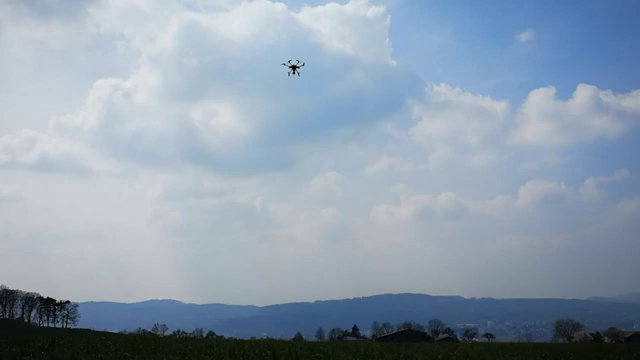

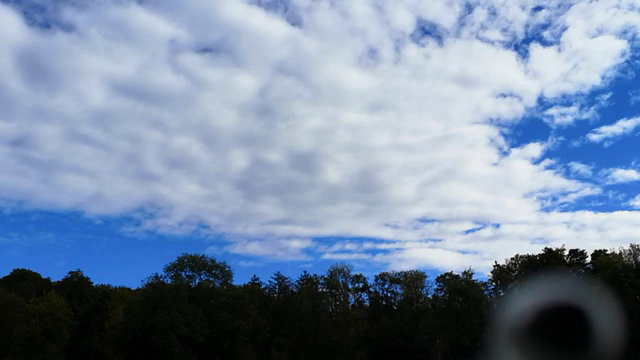

Press 'q' to quit: q


In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Path to the downloaded videos in Google Colab
video_path1 = "/content/VideosDrone Tracking 1.mp4"
video_path2 = "/content/VideosDrone tracking 2.mp4"

# Open the video files
cap1 = cv2.VideoCapture(video_path1)
cap2 = cv2.VideoCapture(video_path2)

# Check if videos opened successfully
if not cap1.isOpened() or not cap2.isOpened():
    print("Error opening video files.")
else:
    # Process each frame of the videos
    while True:
        # Read frames
        ret1, frame1 = cap1.read()
        ret2, frame2 = cap2.read()

        # Break the loop if no frames are read
        if not ret1 or not ret2:
            break

        # Display frames (you can also perform processing here)
        cv2_imshow(frame1)
        cv2_imshow(frame2)

        # Simulate 'q' key press to exit loop (since cv2.waitKey() is not usable)
        try:
            if input("Press 'q' to quit: ").strip().lower() == 'q':
                break
        except KeyboardInterrupt:
            break

    # Release the video capture objects
    cap1.release()
    cap2.release()



#Step 1: Split Videos into Frames

In [ ]:
import cv2
import os

# Create a directory to store detection results
detections_dir = "/content/detections"
os.makedirs(detections_dir, exist_ok=True)

# Function to process each video and detect drones
def detect_drones(video_path, detections_dir):
    # Open the video file
    cap = cv2.VideoCapture(video_path)

    # Check if the video opened successfully
    if not cap.isOpened():
        print(f"Error opening video file: {video_path}")
        return

    # Initialize the frame counter
    frame_count = 0

    # Process each frame
    while True:
        # Read the next frame
        ret, frame = cap.read()

        # If frame is not read successfully, break the loop
        if not ret:
            break

        # TODO: Perform drone detection on 'frame' using a deep learning model

        # For now, let's save each frame to the detections directory
        frame_filename = os.path.join(detections_dir, f"frame_{frame_count}.jpg")
        cv2.imwrite(frame_filename, frame)
        print(f"Saved frame {frame_count}")

        # Increment frame count
        frame_count += 1

    # Release the video capture object
    cap.release()

# Process each video
detect_drones(video_path1, detections_dir)
detect_drones(video_path2, detections_dir)

print("Video processing complete.")


Streaming output truncated to the last 5000 lines.
Saved frame 10410
Saved frame 10411
Saved frame 10412
Saved frame 10413
Saved frame 10414
Saved frame 10415
Saved frame 10416
Saved frame 10417
Saved frame 10418
Saved frame 10419
Saved frame 10420
Saved frame 10421
Saved frame 10422
Saved frame 10423
Saved frame 10424
Saved frame 10425
Saved frame 10426
Saved frame 10427
Saved frame 10428
Saved frame 10429
Saved frame 10430
Saved frame 10431
Saved frame 10432
Saved frame 10433
Saved frame 10434
Saved frame 10435
Saved frame 10436
Saved frame 10437
Saved frame 10438
Saved frame 10439
Saved frame 10440
Saved frame 10441
Saved frame 10442
Saved frame 10443
Saved frame 10444
Saved frame 10445
Saved frame 10446
Saved frame 10447
Saved frame 10448
Saved frame 10449
Saved frame 10450
Saved frame 10451
Saved frame 10452
Saved frame 10453
Saved frame 10454
Saved frame 10455
Saved frame 10456
Saved frame 10457
Saved frame 10458
Saved frame 10459
Saved frame 10460
Saved frame 10461
Saved frame 1